In [1]:
import pickle5 as pickle
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import text

# to visualize the column transformer and pipeline
from sklearn import set_config
set_config(display='diagram')

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib as mpl

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

## 1. Load the dicts with the lyrics

In [2]:
with open('./data/lyrics_fa.pkl', 'rb') as f:
    all_lyrics_fr = pickle.load(f)

In [6]:
with open('./data/lyrics_ga.pkl', 'rb') as f:
    all_lyrics_ga = pickle.load(f)

all_lyrics_ga

{'1,000 Years': 'Well, the moon I know, in the town I live, is steady as she waits. It seems as though she yearns for me and calls me by my name. Sometimes she says come to me, kiss me while it\'s late. And other nights she\'s just hanging with the stars.  And I\'ve seen her waiting from all her mistakes And what if he never comes when you call?  And, "Hey, hey it\'s alright," she says, "Once upon a time I lived a perfect night. Hey, hey in another life," she says, "In a dream of mine from a thousand years ago."  "Don\'t look back," I heard a voice, in velvet I couldn\'t see. The pictures then were black and white, and the details were in between. I heard about a woman once, who did everything ever asked of her. She died last week and her last words were, "It wasn\'t worth it."  And I\'ve seen her patience through all her mistakes And who\'s gonna save you now?  And, "Hey, hey it\'s alright," she says, "Once upon a time I lived a perfect night. Hey, hey in another life," she says, "In 

In [4]:
with open('./data/lyrics_lc.pkl', 'rb') as f:
    all_lyrics_lc = pickle.load(f)

In [32]:
def make_wordcloud(name_artist_1, lyrics_artist_1, name_artist_2, lyrics_artist_2):
    text_artist_1 = ""
    text_artist_2 = ""
    artist_names = [name_artist_1, name_artist_2]

    for song in lyrics_artist_1.values():
        text_artist_1 += " " + song

    for song in lyrics_artist_2.values():
        text_artist_2 += " " + song

    cv = CountVectorizer(stop_words="english")
    # fit transform our text and create a dataframe with the result
    X = cv.fit_transform([text_artist_1, text_artist_2])
    X = X.toarray()

    bow = pd.DataFrame(X, columns=cv.get_feature_names())
    bow.index = [name_artist_1, name_artist_2]

    text1_dict = bow.loc[name_artist_1].sort_values(ascending=False).to_dict()
    text2_dict = bow.loc['Gaslight Anthem'].sort_values(ascending=False).to_dict()

    wordcloud = WordCloud(min_word_length=3,
                          background_color='white')

    dict_list = [text1_dict, text2_dict]

    plt.rcParams["figure.figsize"] = (30, 20)
    plt.figure()
    for t in range(2):
        i = t + 1
        plt.subplot(1, 2, i).set_title(artist_names[t], fontsize=30)
        plt.plot()
        plt.imshow(wordcloud.generate_from_frequencies(dict_list[t]), interpolation='bilinear')
        plt.axis("off")
    plt.show()

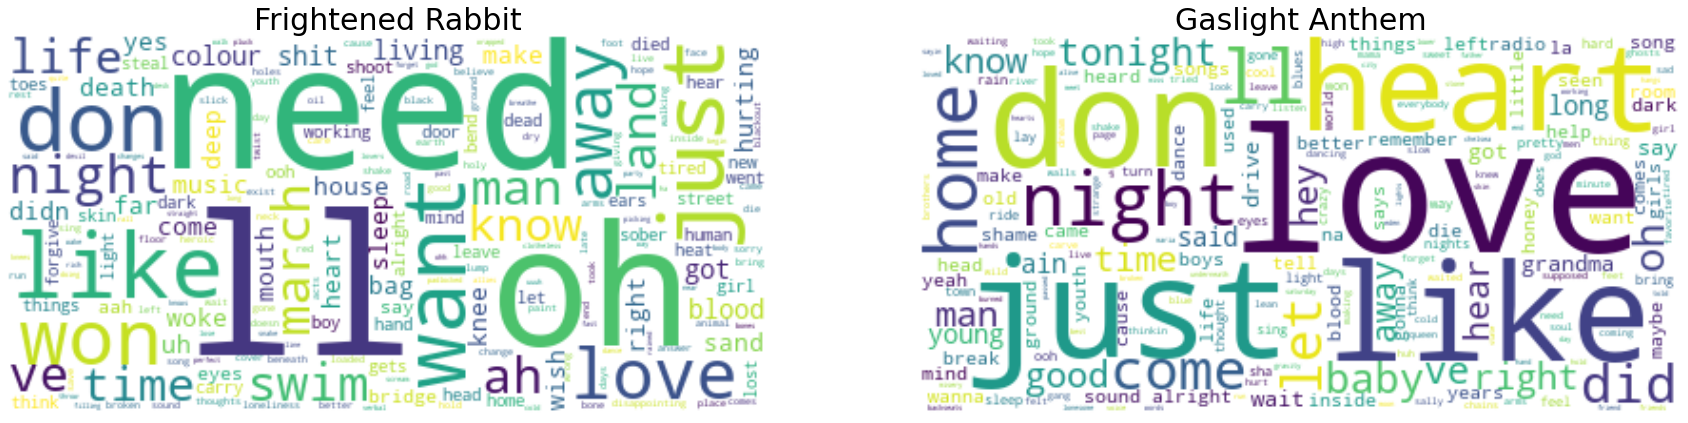

In [33]:
make_wordcloud("Frightened Rabbit", all_lyrics_fr, "Gaslight Anthem", all_lyrics_ga)

## 2. Create a string which combines all lyrics

In [111]:
text_fr = ""

for song in all_lyrics_fr.values():
    text_fr += (" " + song).lower()

In [112]:
text_ga = ""

for song in all_lyrics_ga.values():
    text_ga += (" " + song).lower()

## 3. Create a wordcloud

### 3.1 Version 1

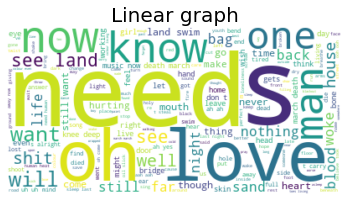

In [29]:
#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True,
                      background_color = "white").generate(text)

#plot the wordcloud object

plt.imshow(wordcloud, interpolation='bilInear')
plt.title("Linear graph",
          fontsize=20)
plt.axis('off')
plt.show()

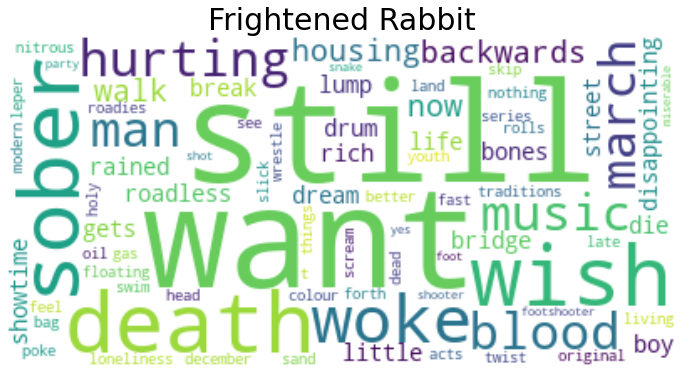

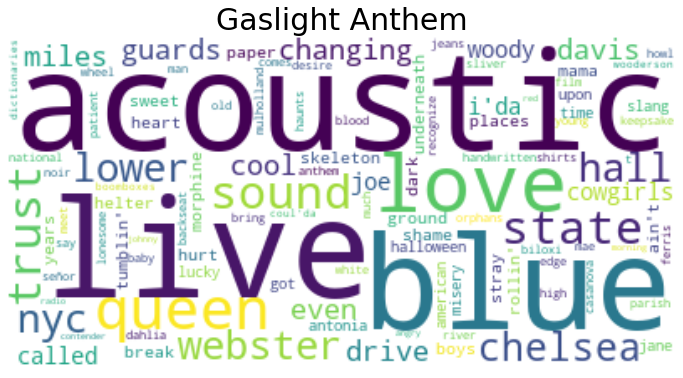

In [43]:
def make_wordcloud(name_artist_1, lyrics_artist_1, name_artist_2, lyrics_artist_2):
    file = [lyrics_artist_1, lyrics_artist_2]
    text_artist_1 = ""
    text_artist_2 = ""
    text_list = [text_artist_1, text_artist_2]
    artist_names = [name_artist_1, name_artist_2]

    for i in range(2):
        for song in file[i]:
            text_list[i] += (" " + song).lower()

    # create the wordcloud object
    for i in range(2):
        wordcloud = WordCloud(stopwords=STOPWORDS,
                              collocations=True,
                              background_color="white").generate(text_list[i])

        # plot the wordcloud object

        plt.rcParams["figure.figsize"] = (12,12)
        plt.imshow(wordcloud, interpolation='bilInear')
        plt.title(artist_names[i],
                  fontsize=30)
        plt.axis('off')
        plt.show()

make_wordcloud("Frightened Rabbit", all_lyrics_fr, "Gaslight Anthem", all_lyrics_ga)

### 3.2 Version 2

In [73]:
#instantiate a CountVectorizer object
# utilize the new STOP_WORDS list

cv=CountVectorizer(stop_words="english")

# fit transform our text and create a dataframe with the result
X = cv.fit_transform([text_fr, text_ga])
X = X.toarray()

bow=pd.DataFrame(X, columns = cv.get_feature_names())
bow.index=["Frightened Rabbit", "Gaslight Anthem"]

In [102]:
text1_dict=bow.loc['Frightened Rabbit'].sort_values(ascending=False).to_dict()

In [103]:
text2_dict=bow.loc['Gaslight Anthem'].sort_values(ascending=False).to_dict()

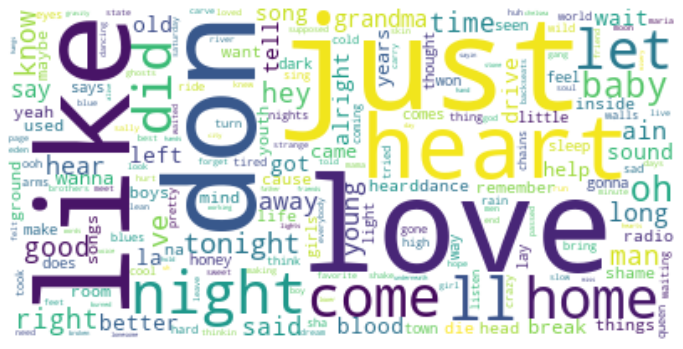

In [98]:
# create the WordCloud object
wordcloud = WordCloud(min_word_length =3,
                      background_color='white')


#plot
plt.imshow(wordcloud.generate_from_frequencies(text2_dict), interpolation='bilinear')
plt.axis('off')
plt.show()

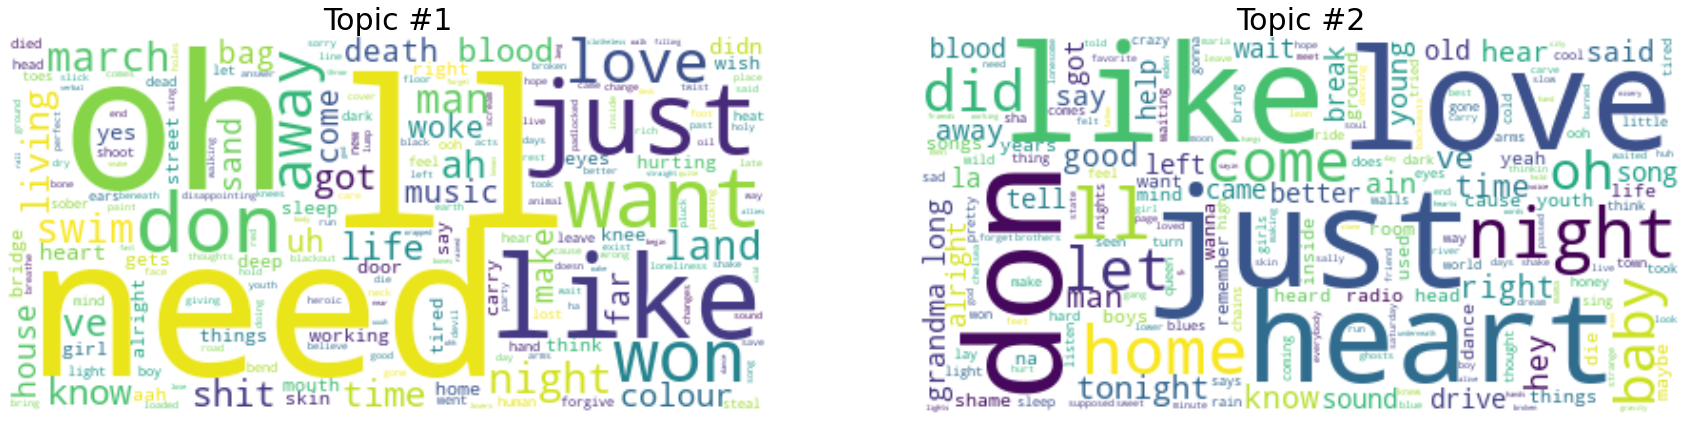

In [110]:
# Create two wordclouds next to each other
list = [text1_dict, text2_dict]
artists = ["artist 1", "artist 2"]

plt.rcParams["figure.figsize"] = (30,20)
plt.figure()
for t in range(2):
    i=t+1
    list = [text1_dict, text2_dict]
    plt.subplot(1, 2, i).set_title("Topic #" + str(i), fontsize=30)
    plt.plot()
    plt.imshow(wordcloud.generate_from_frequencies(list[t]), interpolation='bilinear')
    plt.axis("off")
plt.show()

## 4. Create two corpus (rock/rock and rock/hip-hop)

In [5]:
lyrics_list_fr = [value for value in all_lyrics_fr.values()][:30]

In [6]:
lyrics_list_ga = [value for value in all_lyrics_ga.values()][:30]

In [7]:
lyrics_list_lc = [value for value in all_lyrics_lc.values()]

In [8]:
#Create the rock/rock corpus
corpus_rr = lyrics_list_fr + lyrics_list_ga

In [9]:
labels_rr = ["Frightened Rabbit"] * 30 + ["Gaslight Anthem"] * 30

In [10]:
#Create the rock/hip-hop corpus
corpus_rh = lyrics_list_fr + lyrics_list_lc

In [11]:
labels_rh = ["Gaslight Anthem"] * 30 + ["Loyle Carner"] * 27

## 5. Train/Test Split

In [12]:
def countvectorize_tfidf_clf_gridsearch(corpus, labels):

    #Assign X and y
    X = corpus
    y = labels

    #Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

    #Set the parameters
    parameters_lr = {
        "clf__penalty": ("l1","l2","elasticnet","none"),
    }

    parameters_rf = {
        "clf__max_depth": (3, 10, 100),
        "clf__n_estimators": (3, 10)
    }

    parameters_svc = {
        "clf__kernel": ("linear", "poly", "rbf", "sigmoid", "precomputed")
    }

    parameters_nb = {
        "clf__alpha": (0.001, 1, 10)
    }

    #Which models to use
    models = [
        LogisticRegression(),
        RandomForestClassifier(),
        SVC(),
        MultinomialNB()
    ]

    list_of_parameters = [
        parameters_lr,
        parameters_rf,
        parameters_svc,
        parameters_nb
    ]

    train_scores = list()
    test_scores = list()
    model_name = ""
    best_parameters = ""

    for i, model in enumerate(models):
        parameters = list_of_parameters[i]
        pipeline = Pipeline(
            [
                ("vect", CountVectorizer(stop_words="english", max_df=0.05)),
                ("tfidf", TfidfTransformer()),
                ("clf", model)
            ]
        )

        #Execute GridSearchCV for every model
        grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)
        #Fit the model with the best hyperparameters
        grid_search.fit(X_train, y_train)
        #Calculate the accuracy for train and test data
        train_result = grid_search.score(X_train, y_train)
        test_result = grid_search.score(X_test, y_test)

        train_scores.append(round(train_result, 2))
        test_scores.append(round(test_result, 2))


    df = pd.DataFrame({"Train-Data":train_scores,
                  "Test-Data": test_scores},
                 index=["LogisticRegression", "RandomForest", "SVC", "Naive Bayes"])

    print(df)